In [1]:
import requests
import time
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS, TfidfVectorizer
from textblob import TextBlob
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk import word_tokenize
from nltk.corpus import state_union
from nltk.tag import pos_tag
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
import matplotlib.pyplot as plt
import collections, re
import string
import pylab as plt
import seaborn as sns 
import wordcloud
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_colwidth', 999)

%matplotlib inline

In [2]:
def get_subreddit_data(subreddit,epoch_time):
    url =f'https://api.pushshift.io/reddit/search/submission?subreddit={subreddit}&author!=[deleted]&size=500&is_self=true&before={epoch_time}'
    res = requests.get(url)
    data = res.json()
    return data['data']

In [3]:
def exist_keys(post_to_check):
    if ("author" in post_to_check and "selftext" in post_to_check and "is_self" in post_to_check):
        return True
    else:
        return False

In [4]:
def check_post(post_to_check):
    if exist_keys(post_to_check):
        author = post_to_check['author']
        selftext = post_to_check['selftext']
        is_self = post_to_check['is_self']
        if (author != '[deleted]' and author != 'deleted' and author != 'removed' 
                and selftext != 'removed' and selftext != ""
                and selftext != 'deleted' and 500 < len(selftext) < 5000
                and "http://" not in selftext and "https://" not in selftext
                and is_self) :
            return True
        else:
            return False
    else:
        return False

In [5]:
def get_filtered_posts(subreddit,post_count):
    result = []
    epoch_time = int(time.time())
    is_end_of_topic = False
    while len(result) <= post_count and not is_end_of_topic:
        post_list = get_subreddit_data(subreddit,epoch_time)
        temp_result = [post for post in post_list if check_post(post)]
        result.extend(temp_result)
        if epoch_time != int(result[-1]['created_utc']):
            epoch_time = int(result[-1]['created_utc'])
        else:
            is_end_of_topic = True
    return result

In [8]:
star_wars_posts = get_filtered_posts("StarWars",500)

In [10]:
star_trek_posts = get_filtered_posts("startrek",500)

In [11]:
print(len(star_wars_posts))
for post in star_wars_posts:
    print(post['selftext'])
    print("-------------------------------------------")

502
Backstory- I was looking through some old, scrapped scenes from season 7 (some trashed story arcs, some altered scenes that didn't make the cut) and I came across an older version of Episode 5, wherein Trace is instead a male character named Nyx, who was apparently cut do to being to similar to Han Solo and the fact that Ahsoka already had a love interest. You'd think people would be fine with that, but instead there are about 50 comments of people claiming that Kathleen Kennedy "forced" Dave Filoni to gender swap the characters to "promote her political agenda." Seriously, y'all need to chill- I mean, yeah those episodes suck, but does everything have to be about gender?
-------------------------------------------
It sounds like there are some exciting things happening in The Clone Wars currently, and I have to admit I feel like I'm missing out not watching it. I watched the first few seasons a few years back, but the show ultimately lost me due to some decisions they made I just 

In [12]:
df = pd.DataFrame(star_wars_posts)

In [13]:
df_1=pd.DataFrame(star_trek_posts)

In [14]:
new=df[['subreddit','selftext','title']]
new

,subreddit,selftext,title
0,StarWars,"Backstory- I was looking through some old, scrapped scenes from season 7 (some trashed story arcs, some altered scenes that didn't make the cut) and I came across an older version of Episode 5, wherein Trace is instead a male character named Nyx, who was apparently cut do to being to similar to Han Solo and the fact that Ahsoka already had a love interest. You'd think people would be fine with that, but instead there are about 50 comments of people claiming that Kathleen Kennedy ""forced"" Dave Filoni to gender swap the characters to ""promote her political agenda."" Seriously, y'all need to chill- I mean, yeah those episodes suck, but does everything have to be about gender?",Star Wars fans make me ashamed to be a Star Wars fan
1,StarWars,"It sounds like there are some exciting things happening in The Clone Wars currently, and I have to admit I feel like I'm missing out not watching it. I watched the first few seasons a few years back, but the show ultimately lost me due to some decisions they made I just couldn't get behind - mainly, bringing Darth Maul back (I really thought that was stupid, and diminished Obi-Wan's arc in TPM - killing Maul was his coming of age, and he became a Jedi Knight as the first person to kill a Sith Lord in 1000 years). However, I really like how the show develops Anakin better and portrays his relationship with Obi-Wan, which makes the mentions of Luke's father in the OT much more believable. Unfortunately, the EU has always had both really awesome and also really dumb things happen, so I just choose to ignore the stories I think are ridiculous and accept the good stuff into my own ""canon"". My question is: how big of a part does Darth Maul play in the show overall? Would I be able to wa...",Should I watch The Clone Wars?
2,StarWars,"I have an idea for a Star Wars game. It’s like GTA meets elite dangerous and a couple of other games. It would be a game where you play as a bounty hunter. \n\n• It would have RPG elements with a class system. You could be for example a Trandoshan and would have an emphasis on stealth or a Mandalorian and go in guns blazing etc.\n\n• You can do missions for different syndicates like the Pykes, Hutts and others. Certain crime syndicates have mission types exclusive to them like the pykes having spice running missions. When you do missions for a certain syndicate for a while your respect with them will go up and you will be able to get better rewards for missions from them. \n\n• You can upgrade and buy new gear, weapons ammunition and ships. classes will have special specific gear for them, the Mandalorian class will have vambraces for example. Your ship’s hyperdrive, engines, shields, weapons and more can be upgraded. You can also get a variety of ground vehicles like speeders. Y...",Star Wars video game idea
3,StarWars,"How is it everyone, so me and my family got into a fight well argument about what Darth vader said in Empire strikes back, it was rather ""Luke, I am your father"" or ""I am your father"". So my dad who saw the orginal in the theater and he says it ""I am your father"" but me being born years later and seeing the movies through out my life, and what I have hear is ""luke, i am your father"". And after we got into a large argument, I decided to take it to reddit and now I am for sure people will get on my back for this but me and my sisters have different answers, and I think I should forget about it and belive my dad but I would like to hear all of your answers.",Darth Vaders Empire strikes back famous line
4,StarWars,"These are questions out of general curiosity, they will not be used for anything but my own entertainment:\n\nDo you remember any of the rumors or spoilers surrounding the film's before they came out?\n\n When the prequels came out, what were your impressions of the concepts and actors before you saw the films? \n\nHow did you hear about the films, and what about the advertisements drew you in? \n

In [15]:
new_1=df_1[['subreddit','selftext','title']]
new_1

,subreddit,selftext,title
0,startrek,"Hello there! So bit of background. For me, Star Wars is definitely more of a simple good versus evil adventure story than being the thought provoking social commentary Star Trek is, but still has it's own interesting themes and elements that I think can be applied to life(mysticism of the Force, redemption and sacrifice, confronting inner demons) and there was Palpatine's political machinations to create a dictatorship. The franchise actually inspired my interest in Easter spirituality, given the Jedi are basically space Buddhist(Yoda's ''do or do not'' is like a Zen koan).\n\n\nAnyway, given the current quarantine has left me with extra time, I would love to branch out and explore Star Trek. I remember for a short bit in middle school I was into TNG and did like it and have seen JJ's movies. What are some good places to start, as well as some general facts about the Star Trek universe, it's characters, conflicts, eras etc.",Star Wars fan looking to get into Star Trek?
1,startrek,"I'm trying to figure out how to recreate the door chime sound in TNG, with a small speaker and an arduino. My aim is to create a small system with a speaker on each side, and a button on each side. But i cant for the life of me, figure out the chime tones and make it sound right. If anyone has any ideas as to how to figure this out, let me know. I could get a SDcard hat, but that would be an extra 30-40 bucks just because of a simple tone sequence that i cant figure out, not to mention that would add complexity and size to the design.",TNG Door Chime DIY(help with sound)
2,startrek,"Rewatching DS9 season six with a friend who has never seen DS9 before. First, I love vicariously re-living my first watching through my friend. It's such a job. We just came to the episode Sacrifice of Angels and he commented how anti-climactic the scene was where the prophets eliminate the Dominion fleet and I recalled that I thought the same way when the episode was aired years and years ago. He asked me: ""what happened to them?"" And ""oh wait, don't tell me, I guess we'll find out in a future episode."" I told him, ""nah. That's it, the god-like Prophets wiped them out,"" and he replied ""oh."" \n\n\nMaybe it would have been better to show the wormhole energies going nuts and then slicing through and destroying the Dominion ships. Something more definitive. I know it would have been expensive in an already expensive ep, but it would have been more...satisfying?",Rewatching Season 6 DS9 (spoilers)
3,startrek,"It cost $70,000 per episode of TNG to remaster. This was almost ten years ago. They have made a ton of money with rerun TV deals and much more with streaming. This is cost effective, since HD is more preferable and has an easier sell through. With inflation, and more needed CGI needed let's say each episode of DS9 would now cost $200,000.\n\nThat's $35.2 million for all 176 episodes. The entire series. These days that kind of money will get you three episodes of new TV, or one low budget movie. With DS9 in HD, it would be able to sell for the next 50 years. So this would be a worth it venture (Dare I say trek?).\n\nEven Netflix would do this if asked, as long as they had a two year exclusive window. Again for something that will last a very long time, worth it.\n\nThen there's CBS all access, who is now paying a lot of money for new Star Trek content with partner deals (Disco, Netflix, and Picard, Amazon). Even they could afford this to entice new subscribers. Something that didn'...","Yes, Deep Space Nine Could and Should get Remastered"
4,startrek,"This also applies to Voyager and DS9, to a lesser extent. The late 24th century redshirts are in the command division according to Memory Alpha, where they learn leadership and tactical training. The helm officers are the most visible example of redshirts, other than the captain and first officer. But we see loads of redshirts roaming the halls of the Enterprise-D all the time. W

In [16]:
new

,subreddit,selftext,title
0,StarWars,"Backstory- I was looking through some old, scrapped scenes from season 7 (some trashed story arcs, some altered scenes that didn't make the cut) and I came across an older version of Episode 5, wherein Trace is instead a male character named Nyx, who was apparently cut do to being to similar to Han Solo and the fact that Ahsoka already had a love interest. You'd think people would be fine with that, but instead there are about 50 comments of people claiming that Kathleen Kennedy ""forced"" Dave Filoni to gender swap the characters to ""promote her political agenda."" Seriously, y'all need to chill- I mean, yeah those episodes suck, but does everything have to be about gender?",Star Wars fans make me ashamed to be a Star Wars fan
1,StarWars,"It sounds like there are some exciting things happening in The Clone Wars currently, and I have to admit I feel like I'm missing out not watching it. I watched the first few seasons a few years back, but the show ultimately lost me due to some decisions they made I just couldn't get behind - mainly, bringing Darth Maul back (I really thought that was stupid, and diminished Obi-Wan's arc in TPM - killing Maul was his coming of age, and he became a Jedi Knight as the first person to kill a Sith Lord in 1000 years). However, I really like how the show develops Anakin better and portrays his relationship with Obi-Wan, which makes the mentions of Luke's father in the OT much more believable. Unfortunately, the EU has always had both really awesome and also really dumb things happen, so I just choose to ignore the stories I think are ridiculous and accept the good stuff into my own ""canon"". My question is: how big of a part does Darth Maul play in the show overall? Would I be able to wa...",Should I watch The Clone Wars?
2,StarWars,"I have an idea for a Star Wars game. It’s like GTA meets elite dangerous and a couple of other games. It would be a game where you play as a bounty hunter. \n\n• It would have RPG elements with a class system. You could be for example a Trandoshan and would have an emphasis on stealth or a Mandalorian and go in guns blazing etc.\n\n• You can do missions for different syndicates like the Pykes, Hutts and others. Certain crime syndicates have mission types exclusive to them like the pykes having spice running missions. When you do missions for a certain syndicate for a while your respect with them will go up and you will be able to get better rewards for missions from them. \n\n• You can upgrade and buy new gear, weapons ammunition and ships. classes will have special specific gear for them, the Mandalorian class will have vambraces for example. Your ship’s hyperdrive, engines, shields, weapons and more can be upgraded. You can also get a variety of ground vehicles like speeders. Y...",Star Wars video game idea
3,StarWars,"How is it everyone, so me and my family got into a fight well argument about what Darth vader said in Empire strikes back, it was rather ""Luke, I am your father"" or ""I am your father"". So my dad who saw the orginal in the theater and he says it ""I am your father"" but me being born years later and seeing the movies through out my life, and what I have hear is ""luke, i am your father"". And after we got into a large argument, I decided to take it to reddit and now I am for sure people will get on my back for this but me and my sisters have different answers, and I think I should forget about it and belive my dad but I would like to hear all of your answers.",Darth Vaders Empire strikes back famous line
4,StarWars,"These are questions out of general curiosity, they will not be used for anything but my own entertainment:\n\nDo you remember any of the rumors or spoilers surrounding the film's before they came out?\n\n When the prequels came out, what were your impressions of the concepts and actors before you saw the films? \n\nHow did you hear about the films, and what about the advertisements drew you in? \n

In [17]:
new_1.head()

,subreddit,selftext,title
0,startrek,"Hello there! So bit of background. For me, Star Wars is definitely more of a simple good versus evil adventure story than being the thought provoking social commentary Star Trek is, but still has it's own interesting themes and elements that I think can be applied to life(mysticism of the Force, redemption and sacrifice, confronting inner demons) and there was Palpatine's political machinations to create a dictatorship. The franchise actually inspired my interest in Easter spirituality, given the Jedi are basically space Buddhist(Yoda's ''do or do not'' is like a Zen koan).\n\n\nAnyway, given the current quarantine has left me with extra time, I would love to branch out and explore Star Trek. I remember for a short bit in middle school I was into TNG and did like it and have seen JJ's movies. What are some good places to start, as well as some general facts about the Star Trek universe, it's characters, conflicts, eras etc.",Star Wars fan looking to get into Star Trek?
1,startrek,"I'm trying to figure out how to recreate the door chime sound in TNG, with a small speaker and an arduino. My aim is to create a small system with a speaker on each side, and a button on each side. But i cant for the life of me, figure out the chime tones and make it sound right. If anyone has any ideas as to how to figure this out, let me know. I could get a SDcard hat, but that would be an extra 30-40 bucks just because of a simple tone sequence that i cant figure out, not to mention that would add complexity and size to the design.",TNG Door Chime DIY(help with sound)
2,startrek,"Rewatching DS9 season six with a friend who has never seen DS9 before. First, I love vicariously re-living my first watching through my friend. It's such a job. We just came to the episode Sacrifice of Angels and he commented how anti-climactic the scene was where the prophets eliminate the Dominion fleet and I recalled that I thought the same way when the episode was aired years and years ago. He asked me: ""what happened to them?"" And ""oh wait, don't tell me, I guess we'll find out in a future episode."" I told him, ""nah. That's it, the god-like Prophets wiped them out,"" and he replied ""oh."" \n\n\nMaybe it would have been better to show the wormhole energies going nuts and then slicing through and destroying the Dominion ships. Something more definitive. I know it would have been expensive in an already expensive ep, but it would have been more...satisfying?",Rewatching Season 6 DS9 (spoilers)
3,startrek,"It cost $70,000 per episode of TNG to remaster. This was almost ten years ago. They have made a ton of money with rerun TV deals and much more with streaming. This is cost effective, since HD is more preferable and has an easier sell through. With inflation, and more needed CGI needed let's say each episode of DS9 would now cost $200,000.\n\nThat's $35.2 million for all 176 episodes. The entire series. These days that kind of money will get you three episodes of new TV, or one low budget movie. With DS9 in HD, it would be able to sell for the next 50 years. So this would be a worth it venture (Dare I say trek?).\n\nEven Netflix would do this if asked, as long as they had a two year exclusive window. Again for something that will last a very long time, worth it.\n\nThen there's CBS all access, who is now paying a lot of money for new Star Trek content with partner deals (Disco, Netflix, and Picard, Amazon). Even they could afford this to entice new subscribers. Something that didn'...","Yes, Deep Space Nine Could and Should get Remastered"
4,startrek,"This also applies to Voyager and DS9, to a lesser extent. The late 24th century redshirts are in the command division according to Memory Alpha, where they learn leadership and tactical training. The helm officers are the most visible example of redshirts, other than the captain and first officer. But we see loads of redshirts roaming the halls of the Enterprise-D all the time. W

In [18]:
df_new = pd.DataFrame(new)
df_new

,subreddit,selftext,title
0,StarWars,"Backstory- I was looking through some old, scrapped scenes from season 7 (some trashed story arcs, some altered scenes that didn't make the cut) and I came across an older version of Episode 5, wherein Trace is instead a male character named Nyx, who was apparently cut do to being to similar to Han Solo and the fact that Ahsoka already had a love interest. You'd think people would be fine with that, but instead there are about 50 comments of people claiming that Kathleen Kennedy ""forced"" Dave Filoni to gender swap the characters to ""promote her political agenda."" Seriously, y'all need to chill- I mean, yeah those episodes suck, but does everything have to be about gender?",Star Wars fans make me ashamed to be a Star Wars fan
1,StarWars,"It sounds like there are some exciting things happening in The Clone Wars currently, and I have to admit I feel like I'm missing out not watching it. I watched the first few seasons a few years back, but the show ultimately lost me due to some decisions they made I just couldn't get behind - mainly, bringing Darth Maul back (I really thought that was stupid, and diminished Obi-Wan's arc in TPM - killing Maul was his coming of age, and he became a Jedi Knight as the first person to kill a Sith Lord in 1000 years). However, I really like how the show develops Anakin better and portrays his relationship with Obi-Wan, which makes the mentions of Luke's father in the OT much more believable. Unfortunately, the EU has always had both really awesome and also really dumb things happen, so I just choose to ignore the stories I think are ridiculous and accept the good stuff into my own ""canon"". My question is: how big of a part does Darth Maul play in the show overall? Would I be able to wa...",Should I watch The Clone Wars?
2,StarWars,"I have an idea for a Star Wars game. It’s like GTA meets elite dangerous and a couple of other games. It would be a game where you play as a bounty hunter. \n\n• It would have RPG elements with a class system. You could be for example a Trandoshan and would have an emphasis on stealth or a Mandalorian and go in guns blazing etc.\n\n• You can do missions for different syndicates like the Pykes, Hutts and others. Certain crime syndicates have mission types exclusive to them like the pykes having spice running missions. When you do missions for a certain syndicate for a while your respect with them will go up and you will be able to get better rewards for missions from them. \n\n• You can upgrade and buy new gear, weapons ammunition and ships. classes will have special specific gear for them, the Mandalorian class will have vambraces for example. Your ship’s hyperdrive, engines, shields, weapons and more can be upgraded. You can also get a variety of ground vehicles like speeders. Y...",Star Wars video game idea
3,StarWars,"How is it everyone, so me and my family got into a fight well argument about what Darth vader said in Empire strikes back, it was rather ""Luke, I am your father"" or ""I am your father"". So my dad who saw the orginal in the theater and he says it ""I am your father"" but me being born years later and seeing the movies through out my life, and what I have hear is ""luke, i am your father"". And after we got into a large argument, I decided to take it to reddit and now I am for sure people will get on my back for this but me and my sisters have different answers, and I think I should forget about it and belive my dad but I would like to hear all of your answers.",Darth Vaders Empire strikes back famous line
4,StarWars,"These are questions out of general curiosity, they will not be used for anything but my own entertainment:\n\nDo you remember any of the rumors or spoilers surrounding the film's before they came out?\n\n When the prequels came out, what were your impressions of the concepts and actors before you saw the films? \n\nHow did you hear about the films, and what about the advertisements drew you in? \n

In [19]:
df_new_1 = pd.DataFrame(new_1)
df_new_1

,subreddit,selftext,title
0,startrek,"Hello there! So bit of background. For me, Star Wars is definitely more of a simple good versus evil adventure story than being the thought provoking social commentary Star Trek is, but still has it's own interesting themes and elements that I think can be applied to life(mysticism of the Force, redemption and sacrifice, confronting inner demons) and there was Palpatine's political machinations to create a dictatorship. The franchise actually inspired my interest in Easter spirituality, given the Jedi are basically space Buddhist(Yoda's ''do or do not'' is like a Zen koan).\n\n\nAnyway, given the current quarantine has left me with extra time, I would love to branch out and explore Star Trek. I remember for a short bit in middle school I was into TNG and did like it and have seen JJ's movies. What are some good places to start, as well as some general facts about the Star Trek universe, it's characters, conflicts, eras etc.",Star Wars fan looking to get into Star Trek?
1,startrek,"I'm trying to figure out how to recreate the door chime sound in TNG, with a small speaker and an arduino. My aim is to create a small system with a speaker on each side, and a button on each side. But i cant for the life of me, figure out the chime tones and make it sound right. If anyone has any ideas as to how to figure this out, let me know. I could get a SDcard hat, but that would be an extra 30-40 bucks just because of a simple tone sequence that i cant figure out, not to mention that would add complexity and size to the design.",TNG Door Chime DIY(help with sound)
2,startrek,"Rewatching DS9 season six with a friend who has never seen DS9 before. First, I love vicariously re-living my first watching through my friend. It's such a job. We just came to the episode Sacrifice of Angels and he commented how anti-climactic the scene was where the prophets eliminate the Dominion fleet and I recalled that I thought the same way when the episode was aired years and years ago. He asked me: ""what happened to them?"" And ""oh wait, don't tell me, I guess we'll find out in a future episode."" I told him, ""nah. That's it, the god-like Prophets wiped them out,"" and he replied ""oh."" \n\n\nMaybe it would have been better to show the wormhole energies going nuts and then slicing through and destroying the Dominion ships. Something more definitive. I know it would have been expensive in an already expensive ep, but it would have been more...satisfying?",Rewatching Season 6 DS9 (spoilers)
3,startrek,"It cost $70,000 per episode of TNG to remaster. This was almost ten years ago. They have made a ton of money with rerun TV deals and much more with streaming. This is cost effective, since HD is more preferable and has an easier sell through. With inflation, and more needed CGI needed let's say each episode of DS9 would now cost $200,000.\n\nThat's $35.2 million for all 176 episodes. The entire series. These days that kind of money will get you three episodes of new TV, or one low budget movie. With DS9 in HD, it would be able to sell for the next 50 years. So this would be a worth it venture (Dare I say trek?).\n\nEven Netflix would do this if asked, as long as they had a two year exclusive window. Again for something that will last a very long time, worth it.\n\nThen there's CBS all access, who is now paying a lot of money for new Star Trek content with partner deals (Disco, Netflix, and Picard, Amazon). Even they could afford this to entice new subscribers. Something that didn'...","Yes, Deep Space Nine Could and Should get Remastered"
4,startrek,"This also applies to Voyager and DS9, to a lesser extent. The late 24th century redshirts are in the command division according to Memory Alpha, where they learn leadership and tactical training. The helm officers are the most visible example of redshirts, other than the captain and first officer. But we see loads of redshirts roaming the halls of the Enterprise-D all the time. W

In [20]:
df_new.isnull().sum()

subreddit    0
selftext     0
title        0
dtype: int64

In [21]:
df_new_1.isnull().sum()

subreddit    0
selftext     0
title        0
dtype: int64

In [22]:
df_new.to_csv('df_new.csv',index=False)

In [23]:
df_new_1.to_csv('df_new_1.csv',index=False)

In [24]:
new_1=df_new.dropna()
new_1

,subreddit,selftext,title
0,StarWars,"Backstory- I was looking through some old, scrapped scenes from season 7 (some trashed story arcs, some altered scenes that didn't make the cut) and I came across an older version of Episode 5, wherein Trace is instead a male character named Nyx, who was apparently cut do to being to similar to Han Solo and the fact that Ahsoka already had a love interest. You'd think people would be fine with that, but instead there are about 50 comments of people claiming that Kathleen Kennedy ""forced"" Dave Filoni to gender swap the characters to ""promote her political agenda."" Seriously, y'all need to chill- I mean, yeah those episodes suck, but does everything have to be about gender?",Star Wars fans make me ashamed to be a Star Wars fan
1,StarWars,"It sounds like there are some exciting things happening in The Clone Wars currently, and I have to admit I feel like I'm missing out not watching it. I watched the first few seasons a few years back, but the show ultimately lost me due to some decisions they made I just couldn't get behind - mainly, bringing Darth Maul back (I really thought that was stupid, and diminished Obi-Wan's arc in TPM - killing Maul was his coming of age, and he became a Jedi Knight as the first person to kill a Sith Lord in 1000 years). However, I really like how the show develops Anakin better and portrays his relationship with Obi-Wan, which makes the mentions of Luke's father in the OT much more believable. Unfortunately, the EU has always had both really awesome and also really dumb things happen, so I just choose to ignore the stories I think are ridiculous and accept the good stuff into my own ""canon"". My question is: how big of a part does Darth Maul play in the show overall? Would I be able to wa...",Should I watch The Clone Wars?
2,StarWars,"I have an idea for a Star Wars game. It’s like GTA meets elite dangerous and a couple of other games. It would be a game where you play as a bounty hunter. \n\n• It would have RPG elements with a class system. You could be for example a Trandoshan and would have an emphasis on stealth or a Mandalorian and go in guns blazing etc.\n\n• You can do missions for different syndicates like the Pykes, Hutts and others. Certain crime syndicates have mission types exclusive to them like the pykes having spice running missions. When you do missions for a certain syndicate for a while your respect with them will go up and you will be able to get better rewards for missions from them. \n\n• You can upgrade and buy new gear, weapons ammunition and ships. classes will have special specific gear for them, the Mandalorian class will have vambraces for example. Your ship’s hyperdrive, engines, shields, weapons and more can be upgraded. You can also get a variety of ground vehicles like speeders. Y...",Star Wars video game idea
3,StarWars,"How is it everyone, so me and my family got into a fight well argument about what Darth vader said in Empire strikes back, it was rather ""Luke, I am your father"" or ""I am your father"". So my dad who saw the orginal in the theater and he says it ""I am your father"" but me being born years later and seeing the movies through out my life, and what I have hear is ""luke, i am your father"". And after we got into a large argument, I decided to take it to reddit and now I am for sure people will get on my back for this but me and my sisters have different answers, and I think I should forget about it and belive my dad but I would like to hear all of your answers.",Darth Vaders Empire strikes back famous line
4,StarWars,"These are questions out of general curiosity, they will not be used for anything but my own entertainment:\n\nDo you remember any of the rumors or spoilers surrounding the film's before they came out?\n\n When the prequels came out, what were your impressions of the concepts and actors before you saw the films? \n\nHow did you hear about the films, and what about the advertisements drew you in? \n

In [25]:
new_2=df_new_1.dropna()
new_2

,subreddit,selftext,title
0,startrek,"Hello there! So bit of background. For me, Star Wars is definitely more of a simple good versus evil adventure story than being the thought provoking social commentary Star Trek is, but still has it's own interesting themes and elements that I think can be applied to life(mysticism of the Force, redemption and sacrifice, confronting inner demons) and there was Palpatine's political machinations to create a dictatorship. The franchise actually inspired my interest in Easter spirituality, given the Jedi are basically space Buddhist(Yoda's ''do or do not'' is like a Zen koan).\n\n\nAnyway, given the current quarantine has left me with extra time, I would love to branch out and explore Star Trek. I remember for a short bit in middle school I was into TNG and did like it and have seen JJ's movies. What are some good places to start, as well as some general facts about the Star Trek universe, it's characters, conflicts, eras etc.",Star Wars fan looking to get into Star Trek?
1,startrek,"I'm trying to figure out how to recreate the door chime sound in TNG, with a small speaker and an arduino. My aim is to create a small system with a speaker on each side, and a button on each side. But i cant for the life of me, figure out the chime tones and make it sound right. If anyone has any ideas as to how to figure this out, let me know. I could get a SDcard hat, but that would be an extra 30-40 bucks just because of a simple tone sequence that i cant figure out, not to mention that would add complexity and size to the design.",TNG Door Chime DIY(help with sound)
2,startrek,"Rewatching DS9 season six with a friend who has never seen DS9 before. First, I love vicariously re-living my first watching through my friend. It's such a job. We just came to the episode Sacrifice of Angels and he commented how anti-climactic the scene was where the prophets eliminate the Dominion fleet and I recalled that I thought the same way when the episode was aired years and years ago. He asked me: ""what happened to them?"" And ""oh wait, don't tell me, I guess we'll find out in a future episode."" I told him, ""nah. That's it, the god-like Prophets wiped them out,"" and he replied ""oh."" \n\n\nMaybe it would have been better to show the wormhole energies going nuts and then slicing through and destroying the Dominion ships. Something more definitive. I know it would have been expensive in an already expensive ep, but it would have been more...satisfying?",Rewatching Season 6 DS9 (spoilers)
3,startrek,"It cost $70,000 per episode of TNG to remaster. This was almost ten years ago. They have made a ton of money with rerun TV deals and much more with streaming. This is cost effective, since HD is more preferable and has an easier sell through. With inflation, and more needed CGI needed let's say each episode of DS9 would now cost $200,000.\n\nThat's $35.2 million for all 176 episodes. The entire series. These days that kind of money will get you three episodes of new TV, or one low budget movie. With DS9 in HD, it would be able to sell for the next 50 years. So this would be a worth it venture (Dare I say trek?).\n\nEven Netflix would do this if asked, as long as they had a two year exclusive window. Again for something that will last a very long time, worth it.\n\nThen there's CBS all access, who is now paying a lot of money for new Star Trek content with partner deals (Disco, Netflix, and Picard, Amazon). Even they could afford this to entice new subscribers. Something that didn'...","Yes, Deep Space Nine Could and Should get Remastered"
4,startrek,"This also applies to Voyager and DS9, to a lesser extent. The late 24th century redshirts are in the command division according to Memory Alpha, where they learn leadership and tactical training. The helm officers are the most visible example of redshirts, other than the captain and first officer. But we see loads of redshirts roaming the halls of the Enterprise-D all the time. W

In [26]:
new_df=pd.concat([new_1, new_2], ignore_index=True)
new_df

,subreddit,selftext,title
0,StarWars,"Backstory- I was looking through some old, scrapped scenes from season 7 (some trashed story arcs, some altered scenes that didn't make the cut) and I came across an older version of Episode 5, wherein Trace is instead a male character named Nyx, who was apparently cut do to being to similar to Han Solo and the fact that Ahsoka already had a love interest. You'd think people would be fine with that, but instead there are about 50 comments of people claiming that Kathleen Kennedy ""forced"" Dave Filoni to gender swap the characters to ""promote her political agenda."" Seriously, y'all need to chill- I mean, yeah those episodes suck, but does everything have to be about gender?",Star Wars fans make me ashamed to be a Star Wars fan
1,StarWars,"It sounds like there are some exciting things happening in The Clone Wars currently, and I have to admit I feel like I'm missing out not watching it. I watched the first few seasons a few years back, but the show ultimately lost me due to some decisions they made I just couldn't get behind - mainly, bringing Darth Maul back (I really thought that was stupid, and diminished Obi-Wan's arc in TPM - killing Maul was his coming of age, and he became a Jedi Knight as the first person to kill a Sith Lord in 1000 years). However, I really like how the show develops Anakin better and portrays his relationship with Obi-Wan, which makes the mentions of Luke's father in the OT much more believable. Unfortunately, the EU has always had both really awesome and also really dumb things happen, so I just choose to ignore the stories I think are ridiculous and accept the good stuff into my own ""canon"". My question is: how big of a part does Darth Maul play in the show overall? Would I be able to wa...",Should I watch The Clone Wars?
2,StarWars,"I have an idea for a Star Wars game. It’s like GTA meets elite dangerous and a couple of other games. It would be a game where you play as a bounty hunter. \n\n• It would have RPG elements with a class system. You could be for example a Trandoshan and would have an emphasis on stealth or a Mandalorian and go in guns blazing etc.\n\n• You can do missions for different syndicates like the Pykes, Hutts and others. Certain crime syndicates have mission types exclusive to them like the pykes having spice running missions. When you do missions for a certain syndicate for a while your respect with them will go up and you will be able to get better rewards for missions from them. \n\n• You can upgrade and buy new gear, weapons ammunition and ships. classes will have special specific gear for them, the Mandalorian class will have vambraces for example. Your ship’s hyperdrive, engines, shields, weapons and more can be upgraded. You can also get a variety of ground vehicles like speeders. Y...",Star Wars video game idea
3,StarWars,"How is it everyone, so me and my family got into a fight well argument about what Darth vader said in Empire strikes back, it was rather ""Luke, I am your father"" or ""I am your father"". So my dad who saw the orginal in the theater and he says it ""I am your father"" but me being born years later and seeing the movies through out my life, and what I have hear is ""luke, i am your father"". And after we got into a large argument, I decided to take it to reddit and now I am for sure people will get on my back for this but me and my sisters have different answers, and I think I should forget about it and belive my dad but I would like to hear all of your answers.",Darth Vaders Empire strikes back famous line
4,StarWars,"These are questions out of general curiosity, they will not be used for anything but my own entertainment:\n\nDo you remember any of the rumors or spoilers surrounding the film's before they came out?\n\n When the prequels came out, what were your impressions of the concepts and actors before you saw the films? \n\nHow did you hear about the films, and what about the advertisements drew you in? \n

In [27]:
new_df.to_csv('new_df.csv',index=False)



In [28]:
df_ed = pd.read_csv('new_df.csv')

In [29]:
df_ed.head(5)

,subreddit,selftext,title
0,StarWars,"Backstory- I was looking through some old, scrapped scenes from season 7 (some trashed story arcs, some altered scenes that didn't make the cut) and I came across an older version of Episode 5, wherein Trace is instead a male character named Nyx, who was apparently cut do to being to similar to Han Solo and the fact that Ahsoka already had a love interest. You'd think people would be fine with that, but instead there are about 50 comments of people claiming that Kathleen Kennedy ""forced"" Dave Filoni to gender swap the characters to ""promote her political agenda."" Seriously, y'all need to chill- I mean, yeah those episodes suck, but does everything have to be about gender?",Star Wars fans make me ashamed to be a Star Wars fan
1,StarWars,"It sounds like there are some exciting things happening in The Clone Wars currently, and I have to admit I feel like I'm missing out not watching it. I watched the first few seasons a few years back, but the show ultimately lost me due to some decisions they made I just couldn't get behind - mainly, bringing Darth Maul back (I really thought that was stupid, and diminished Obi-Wan's arc in TPM - killing Maul was his coming of age, and he became a Jedi Knight as the first person to kill a Sith Lord in 1000 years). However, I really like how the show develops Anakin better and portrays his relationship with Obi-Wan, which makes the mentions of Luke's father in the OT much more believable. Unfortunately, the EU has always had both really awesome and also really dumb things happen, so I just choose to ignore the stories I think are ridiculous and accept the good stuff into my own ""canon"". My question is: how big of a part does Darth Maul play in the show overall? Would I be able to wa...",Should I watch The Clone Wars?
2,StarWars,"I have an idea for a Star Wars game. It’s like GTA meets elite dangerous and a couple of other games. It would be a game where you play as a bounty hunter. \n\n• It would have RPG elements with a class system. You could be for example a Trandoshan and would have an emphasis on stealth or a Mandalorian and go in guns blazing etc.\n\n• You can do missions for different syndicates like the Pykes, Hutts and others. Certain crime syndicates have mission types exclusive to them like the pykes having spice running missions. When you do missions for a certain syndicate for a while your respect with them will go up and you will be able to get better rewards for missions from them. \n\n• You can upgrade and buy new gear, weapons ammunition and ships. classes will have special specific gear for them, the Mandalorian class will have vambraces for example. Your ship’s hyperdrive, engines, shields, weapons and more can be upgraded. You can also get a variety of ground vehicles like speeders. Y...",Star Wars video game idea
3,StarWars,"How is it everyone, so me and my family got into a fight well argument about what Darth vader said in Empire strikes back, it was rather ""Luke, I am your father"" or ""I am your father"". So my dad who saw the orginal in the theater and he says it ""I am your father"" but me being born years later and seeing the movies through out my life, and what I have hear is ""luke, i am your father"". And after we got into a large argument, I decided to take it to reddit and now I am for sure people will get on my back for this but me and my sisters have different answers, and I think I should forget about it and belive my dad but I would like to hear all of your answers.",Darth Vaders Empire strikes back famous line
4,StarWars,"These are questions out of general curiosity, they will not be used for anything but my own entertainment:\n\nDo you remember any of the rumors or spoilers surrounding the film's before they came out?\n\n When the prequels came out, what were your impressions of the concepts and actors before you saw the films? \n\nHow did you hear about the films, and what about the advertisements drew you in? \n

In [30]:
import nltk

In [31]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/upasanamahanta/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [32]:
# Import Tokenizer
from nltk.tokenize import RegexpTokenizer

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [34]:
df_ed['subreddit'] = df_ed['subreddit'].map({'StarWars': 0, 'startrek': 1})
df_ed.head()

,subreddit,selftext,title
0,0,"Backstory- I was looking through some old, scrapped scenes from season 7 (some trashed story arcs, some altered scenes that didn't make the cut) and I came across an older version of Episode 5, wherein Trace is instead a male character named Nyx, who was apparently cut do to being to similar to Han Solo and the fact that Ahsoka already had a love interest. You'd think people would be fine with that, but instead there are about 50 comments of people claiming that Kathleen Kennedy ""forced"" Dave Filoni to gender swap the characters to ""promote her political agenda."" Seriously, y'all need to chill- I mean, yeah those episodes suck, but does everything have to be about gender?",Star Wars fans make me ashamed to be a Star Wars fan
1,0,"It sounds like there are some exciting things happening in The Clone Wars currently, and I have to admit I feel like I'm missing out not watching it. I watched the first few seasons a few years back, but the show ultimately lost me due to some decisions they made I just couldn't get behind - mainly, bringing Darth Maul back (I really thought that was stupid, and diminished Obi-Wan's arc in TPM - killing Maul was his coming of age, and he became a Jedi Knight as the first person to kill a Sith Lord in 1000 years). However, I really like how the show develops Anakin better and portrays his relationship with Obi-Wan, which makes the mentions of Luke's father in the OT much more believable. Unfortunately, the EU has always had both really awesome and also really dumb things happen, so I just choose to ignore the stories I think are ridiculous and accept the good stuff into my own ""canon"". My question is: how big of a part does Darth Maul play in the show overall? Would I be able to wa...",Should I watch The Clone Wars?
2,0,"I have an idea for a Star Wars game. It’s like GTA meets elite dangerous and a couple of other games. It would be a game where you play as a bounty hunter. \n\n• It would have RPG elements with a class system. You could be for example a Trandoshan and would have an emphasis on stealth or a Mandalorian and go in guns blazing etc.\n\n• You can do missions for different syndicates like the Pykes, Hutts and others. Certain crime syndicates have mission types exclusive to them like the pykes having spice running missions. When you do missions for a certain syndicate for a while your respect with them will go up and you will be able to get better rewards for missions from them. \n\n• You can upgrade and buy new gear, weapons ammunition and ships. classes will have special specific gear for them, the Mandalorian class will have vambraces for example. Your ship’s hyperdrive, engines, shields, weapons and more can be upgraded. You can also get a variety of ground vehicles like speeders. Y...",Star Wars video game idea
3,0,"How is it everyone, so me and my family got into a fight well argument about what Darth vader said in Empire strikes back, it was rather ""Luke, I am your father"" or ""I am your father"". So my dad who saw the orginal in the theater and he says it ""I am your father"" but me being born years later and seeing the movies through out my life, and what I have hear is ""luke, i am your father"". And after we got into a large argument, I decided to take it to reddit and now I am for sure people will get on my back for this but me and my sisters have different answers, and I think I should forget about it and belive my dad but I would like to hear all of your answers.",Darth Vaders Empire strikes back famous line
4,0,"These are questions out of general curiosity, they will not be used for anything but my own entertainment:\n\nDo you remember any of the rumors or spoilers surrounding the film's before they came out?\n\n When the prequels came out, what were your impressions of the concepts and actors before you saw the films? \n\nHow did you hear about the films, and what about the advertisements drew you in? \n\nDescribe your first experience wi

In [35]:
df_ed.isnull().sum()

subreddit    0
selftext     0
title        0
dtype: int64

In [ ]:
#Cleaning the selftext for visualization

In [36]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [37]:
df_ed.drop(df_ed.columns[df_ed.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

def preprocess(SelfText):
    SelfText = SelfText.astype(str).str.replace("(<br/>)", "")
    SelfText = SelfText.astype(str).str.replace('(<a).*(>).*(</a>)', '')
    SelfText = SelfText.astype(str).str.replace('(&amp)', '')
    SelfText = SelfText.astype(str).str.replace('(\n)', '')
    SelfText = SelfText.astype(str).str.replace('(\t)', '')
    SelfText = SelfText.astype(str).str.replace('(&gt)', '')
    SelfText = SelfText.astype(str).str.replace('(&lt)', '')
    SelfText = SelfText.astype(str).str.replace('(\xa0)', ' ')  
    return SelfText
df_ed['selftext'] = preprocess(df_ed['selftext'])

df_ed['polarity'] = df_ed['selftext'].map(lambda text: TextBlob(text).sentiment.polarity)
df_ed['text_len'] = df_ed['selftext'].astype(str).apply(len)
df_ed['word_count'] = df_ed['selftext'].apply(lambda x: len(str(x).split()))

In [38]:
df_ed.head()

,subreddit,selftext,title,polarity,text_len,word_count
0,0,"Backstory- I was looking through some old, scrapped scenes from season 7 (some trashed story arcs, some altered scenes that didn't make the cut) and I came across an older version of Episode 5, wherein Trace is instead a male character named Nyx, who was apparently cut do to being to similar to Han Solo and the fact that Ahsoka already had a love interest. You'd think people would be fine with that, but instead there are about 50 comments of people claiming that Kathleen Kennedy ""forced"" Dave Filoni to gender swap the characters to ""promote her political agenda."" Seriously, y'all need to chill- I mean, yeah those episodes suck, but does everything have to be about gender?",Star Wars fans make me ashamed to be a Star Wars fan,0.026136,680,118
1,0,"It sounds like there are some exciting things happening in The Clone Wars currently, and I have to admit I feel like I'm missing out not watching it. I watched the first few seasons a few years back, but the show ultimately lost me due to some decisions they made I just couldn't get behind - mainly, bringing Darth Maul back (I really thought that was stupid, and diminished Obi-Wan's arc in TPM - killing Maul was his coming of age, and he became a Jedi Knight as the first person to kill a Sith Lord in 1000 years). However, I really like how the show develops Anakin better and portrays his relationship with Obi-Wan, which makes the mentions of Luke's father in the OT much more believable. Unfortunately, the EU has always had both really awesome and also really dumb things happen, so I just choose to ignore the stories I think are ridiculous and accept the good stuff into my own ""canon"". My question is: how big of a part does Darth Maul play in the show overall? Would I be able to wa...",Should I watch The Clone Wars?,0.098810,1321,250
2,0,"I have an idea for a Star Wars game. It’s like GTA meets elite dangerous and a couple of other games. It would be a game where you play as a bounty hunter. • It would have RPG elements with a class system. You could be for example a Trandoshan and would have an emphasis on stealth or a Mandalorian and go in guns blazing etc.• You can do missions for different syndicates like the Pykes, Hutts and others. Certain crime syndicates have mission types exclusive to them like the pykes having spice running missions. When you do missions for a certain syndicate for a while your respect with them will go up and you will be able to get better rewards for missions from them. • You can upgrade and buy new gear, weapons ammunition and ships. classes will have special specific gear for them, the Mandalorian class will have vambraces for example. Your ship’s hyperdrive, engines, shields, weapons and more can be upgraded. You can also get a variety of ground vehicles like speeders. You are also ...",Star Wars video game idea,0.010373,1730,305
3,0,"How is it everyone, so me and my family got into a fight well argument about what Darth vader said in Empire strikes back, it was rather ""Luke, I am your father"" or ""I am your father"". So my dad who saw the orginal in the theater and he says it ""I am your father"" but me being born years later and seeing the movies through out my life, and what I have hear is ""luke, i am your father"". And after we got into a large argument, I decided to take it to reddit and now I am for sure people will get on my back for this but me and my sisters have different answers, and I think I should forget about it and belive my dad but I would like to hear all of your answers.",Darth Vaders Empire strikes back famous line,0.119048,662,139
4,0,"These are questions out of general curiosity, they will not be used for anything but my own entertainment:Do you remember any of the rumors or spoilers surrounding the film's before they came out? When the prequels came out, what were your impressions of the concepts and actors before you saw the films? How did you hear about the film

In [39]:
df_ed.loc[df_ed.polarity < -0.4, ['selftext']]

,selftext


In [ ]:
### Checking sentiment polarity greater than 0.4

In [40]:
print('5 random selftext with the sentiment polarity greater than 0.4 : \n')
cl = df_ed.loc[df_ed.polarity > 0.3, ['selftext']].sample(5).values
for c in cl:
    print(c[0])
    print("-----------------------------------------------------------")

5 random selftext with the sentiment polarity greater than 0.4 : 

In my opinion, with no death threats wanted. I believe Disney saved Star Wars. I love ROTS, but I think George Lucas did not have interest in Episodes 1 and 2, he just wanted ROTS to be made. Which did work out for that movie. But the sequel trilogy has been very good in my opinion. (Nothing like the originals of course.) 7 is great, 8 is probably the most okay you can get, and I really loved 9. I also think it's much easier to be a Star Wars fan now with all the games, shows, and even spin off movies. The Disney+ program has been centered around Star Wars, with Mandalorian being a work of art.
-----------------------------------------------------------
I've just started watching the Star Wars saga and would love to get suggestions on the best watch order that I could follow. I came across the following list and was wondering if this is a good order:  1. *Rogue One: A Star Wars Story*2. *Star Wars: Episode IV – A New Ho

In [41]:
df_ed.sample

<bound method NDFrame.sample of       subreddit  \
0             0   
1             0   
2             0   
3             0   
4             0   
...         ...   
1020          1   
1021          1   
1022          1   
1023          1   
1024          1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [42]:
df_ed.head()

,subreddit,selftext,title,polarity,text_len,word_count
0,0,"Backstory- I was looking through some old, scrapped scenes from season 7 (some trashed story arcs, some altered scenes that didn't make the cut) and I came across an older version of Episode 5, wherein Trace is instead a male character named Nyx, who was apparently cut do to being to similar to Han Solo and the fact that Ahsoka already had a love interest. You'd think people would be fine with that, but instead there are about 50 comments of people claiming that Kathleen Kennedy ""forced"" Dave Filoni to gender swap the characters to ""promote her political agenda."" Seriously, y'all need to chill- I mean, yeah those episodes suck, but does everything have to be about gender?",Star Wars fans make me ashamed to be a Star Wars fan,0.026136,680,118
1,0,"It sounds like there are some exciting things happening in The Clone Wars currently, and I have to admit I feel like I'm missing out not watching it. I watched the first few seasons a few years back, but the show ultimately lost me due to some decisions they made I just couldn't get behind - mainly, bringing Darth Maul back (I really thought that was stupid, and diminished Obi-Wan's arc in TPM - killing Maul was his coming of age, and he became a Jedi Knight as the first person to kill a Sith Lord in 1000 years). However, I really like how the show develops Anakin better and portrays his relationship with Obi-Wan, which makes the mentions of Luke's father in the OT much more believable. Unfortunately, the EU has always had both really awesome and also really dumb things happen, so I just choose to ignore the stories I think are ridiculous and accept the good stuff into my own ""canon"". My question is: how big of a part does Darth Maul play in the show overall? Would I be able to wa...",Should I watch The Clone Wars?,0.098810,1321,250
2,0,"I have an idea for a Star Wars game. It’s like GTA meets elite dangerous and a couple of other games. It would be a game where you play as a bounty hunter. • It would have RPG elements with a class system. You could be for example a Trandoshan and would have an emphasis on stealth or a Mandalorian and go in guns blazing etc.• You can do missions for different syndicates like the Pykes, Hutts and others. Certain crime syndicates have mission types exclusive to them like the pykes having spice running missions. When you do missions for a certain syndicate for a while your respect with them will go up and you will be able to get better rewards for missions from them. • You can upgrade and buy new gear, weapons ammunition and ships. classes will have special specific gear for them, the Mandalorian class will have vambraces for example. Your ship’s hyperdrive, engines, shields, weapons and more can be upgraded. You can also get a variety of ground vehicles like speeders. You are also ...",Star Wars video game idea,0.010373,1730,305
3,0,"How is it everyone, so me and my family got into a fight well argument about what Darth vader said in Empire strikes back, it was rather ""Luke, I am your father"" or ""I am your father"". So my dad who saw the orginal in the theater and he says it ""I am your father"" but me being born years later and seeing the movies through out my life, and what I have hear is ""luke, i am your father"". And after we got into a large argument, I decided to take it to reddit and now I am for sure people will get on my back for this but me and my sisters have different answers, and I think I should forget about it and belive my dad but I would like to hear all of your answers.",Darth Vaders Empire strikes back famous line,0.119048,662,139
4,0,"These are questions out of general curiosity, they will not be used for anything but my own entertainment:Do you remember any of the rumors or spoilers surrounding the film's before they came out? When the prequels came out, what were your impressions of the concepts and actors before you saw the films? How did you hear about the film

In [43]:
df_ed['polarity'].iplot(
    kind='hist',
    bins=50,
    xTitle='polarity',
    linecolor='black',
    yTitle='count',
    title='Sentiment Polarity Distribution')

In [ ]:
#Vast majority of the sentiment polarity scores are greater than zero, means most of them are pretty positive.

In [44]:
df_ed['text_len'].iplot(
    kind='hist',
    bins=100,
    xTitle='text length',
    linecolor='black',
    yTitle='count',
    title='Post Text Length Distribution')

In [ ]:
#There were quite number of people like to leave long reviews.

In [45]:
df_ed['word_count'].iplot(
    kind='hist',
    bins=100,
    xTitle='word count',
    linecolor='black',
    yTitle='count',
    title='Post Text Word Count Distribution')

In [ ]:
##Word count ranges are not showing very high count level.Most of the words count in between 80-100

In [46]:
df_ed.groupby('subreddit').count()['selftext'].iplot(kind='bar', yTitle='Count', linecolor='black', opacity=0.8,
                                                           title='Bar chart of subreddit ', xTitle='Subreddit Name')

In [47]:
df_ed.head()

,subreddit,selftext,title,polarity,text_len,word_count
0,0,"Backstory- I was looking through some old, scrapped scenes from season 7 (some trashed story arcs, some altered scenes that didn't make the cut) and I came across an older version of Episode 5, wherein Trace is instead a male character named Nyx, who was apparently cut do to being to similar to Han Solo and the fact that Ahsoka already had a love interest. You'd think people would be fine with that, but instead there are about 50 comments of people claiming that Kathleen Kennedy ""forced"" Dave Filoni to gender swap the characters to ""promote her political agenda."" Seriously, y'all need to chill- I mean, yeah those episodes suck, but does everything have to be about gender?",Star Wars fans make me ashamed to be a Star Wars fan,0.026136,680,118
1,0,"It sounds like there are some exciting things happening in The Clone Wars currently, and I have to admit I feel like I'm missing out not watching it. I watched the first few seasons a few years back, but the show ultimately lost me due to some decisions they made I just couldn't get behind - mainly, bringing Darth Maul back (I really thought that was stupid, and diminished Obi-Wan's arc in TPM - killing Maul was his coming of age, and he became a Jedi Knight as the first person to kill a Sith Lord in 1000 years). However, I really like how the show develops Anakin better and portrays his relationship with Obi-Wan, which makes the mentions of Luke's father in the OT much more believable. Unfortunately, the EU has always had both really awesome and also really dumb things happen, so I just choose to ignore the stories I think are ridiculous and accept the good stuff into my own ""canon"". My question is: how big of a part does Darth Maul play in the show overall? Would I be able to wa...",Should I watch The Clone Wars?,0.098810,1321,250
2,0,"I have an idea for a Star Wars game. It’s like GTA meets elite dangerous and a couple of other games. It would be a game where you play as a bounty hunter. • It would have RPG elements with a class system. You could be for example a Trandoshan and would have an emphasis on stealth or a Mandalorian and go in guns blazing etc.• You can do missions for different syndicates like the Pykes, Hutts and others. Certain crime syndicates have mission types exclusive to them like the pykes having spice running missions. When you do missions for a certain syndicate for a while your respect with them will go up and you will be able to get better rewards for missions from them. • You can upgrade and buy new gear, weapons ammunition and ships. classes will have special specific gear for them, the Mandalorian class will have vambraces for example. Your ship’s hyperdrive, engines, shields, weapons and more can be upgraded. You can also get a variety of ground vehicles like speeders. You are also ...",Star Wars video game idea,0.010373,1730,305
3,0,"How is it everyone, so me and my family got into a fight well argument about what Darth vader said in Empire strikes back, it was rather ""Luke, I am your father"" or ""I am your father"". So my dad who saw the orginal in the theater and he says it ""I am your father"" but me being born years later and seeing the movies through out my life, and what I have hear is ""luke, i am your father"". And after we got into a large argument, I decided to take it to reddit and now I am for sure people will get on my back for this but me and my sisters have different answers, and I think I should forget about it and belive my dad but I would like to hear all of your answers.",Darth Vaders Empire strikes back famous line,0.119048,662,139
4,0,"These are questions out of general curiosity, they will not be used for anything but my own entertainment:Do you remember any of the rumors or spoilers surrounding the film's before they came out? When the prequels came out, what were your impressions of the concepts and actors before you saw the films? How did you hear about the film

In [48]:
filtered_words=df_ed['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords.words('english')]))

bagsofwords_1 = [ collections.Counter(re.findall(r'\w+', txt)) for txt in filtered_words]
sumbags = sum(bagsofwords_1, collections.Counter())

In [49]:
A=pd.Series.to_string(filtered_words)
tagged_sent = pos_tag(A.split())
propernouns = [word for word,pos in tagged_sent if pos == 'NNP']

propernouns_count=Counter(propernouns)

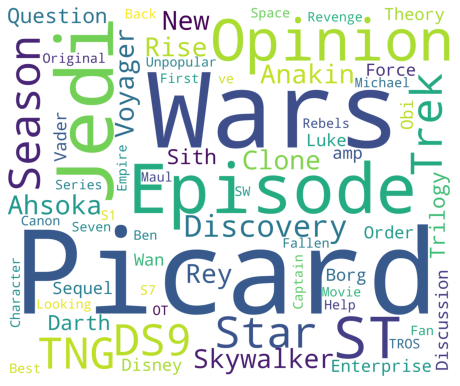

In [50]:
most_common_100 = propernouns_count.most_common(101)
most_common_100 = pd.DataFrame(most_common_100)
most_common_100 = most_common_100.drop(most_common_100.index[1])
most_common_100 = most_common_100.drop(most_common_100.index[38])

most_common_100.rename(columns={0:'text',1:'score'},inplace=True)
wordcloud1 = WordCloud(background_color='white', width=3000, height=2500).generate(' '.join(most_common_100['text']))

plt.figure(1,figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.show()

In [ ]:
##Wordcloud -top 100 words taking from both the clouds to visualize the words

In [51]:
custom_stop = list(ENGLISH_STOP_WORDS)
cv = CountVectorizer(stop_words = custom_stop, min_df = 6)
X_cv = cv.fit_transform(df_ed['selftext'])
X_cv

<1025x2441 sparse matrix of type '<class 'numpy.int64'>'
	with 59809 stored elements in Compressed Sparse Row format>

In [52]:
custom_stop = list(ENGLISH_STOP_WORDS)
cv = CountVectorizer(stop_words = custom_stop, min_df = 6)
X_cv = cv.fit_transform(df_ed['selftext'])
df_features = pd.DataFrame(data = X_cv.todense(),
                           columns = cv.get_feature_names())
df_features.head()

,10,100,11,12,13,14,15,16,17,19,...,yes,yesterday,yoda,young,younger,younglings,youtube,zero,zhat,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
common_words=df_features.sum().sort_values(ascending = False).head(50).index

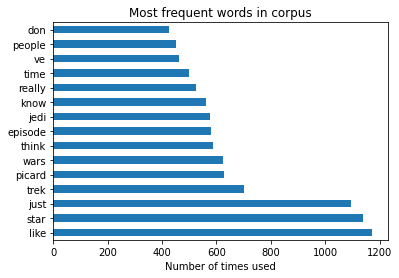

In [54]:
common_words = df_features.sum().sort_values(ascending = False).head(50).index
df_features.sum().sort_values(ascending = False).head(15).plot.barh()
plt.title('Most frequent words in corpus')
plt.xlabel('Number of times used');

In [ ]:
##Most frequent words in both the corpus 

In [55]:
df_features=pd.merge(df_features,df_ed['subreddit'],left_index=True,right_index=True)

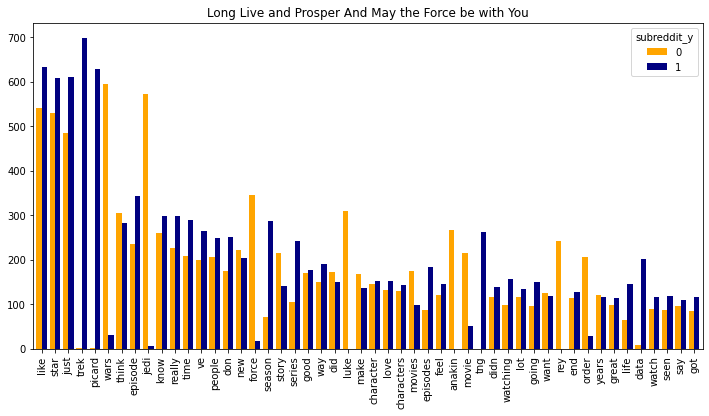

In [56]:
fig, ax = plt.subplots(figsize = (12, 6))
df_features.groupby('subreddit_y').sum()[common_words].T.plot.bar(ax = ax,
                                                               width = 0.8,
                                                               color = ['Orange', 'Navy', 'Black'])
ax.set_title('Long Live and Prosper And May the Force be with You');

In [ ]:
##Most frequent words used in both reddits

In [57]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df_ed['selftext'], 20)
for word, freq in common_words:
    print(word, freq)
df_ed1 = pd.DataFrame(common_words, columns = ['selftext' , 'count'])
df_ed1.groupby('selftext').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 text in selftext before removing stop words')

the 11977
and 6280
to 5777
of 5020
it 3380
that 3140
in 3054
is 2633
was 1948
but 1925
for 1704
with 1675
this 1564
they 1434
on 1372
as 1361
have 1340
he 1329
be 1307
you 1240


In [ ]:
#The distribution of top unigrams before removing stop words

In [58]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df_ed['selftext'], 20)
for word, freq in common_words:
    print(word, freq)
df_ed2 = pd.DataFrame(common_words, columns = ['selftext' , 'count'])
df_ed2.groupby('selftext').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 text in selftext after removing stop words')

like 1172
star 1137
just 1095
trek 700
picard 629
wars 625
think 586
episode 579
jedi 577
know 560
really 526
time 498
ve 463
people 453
don 426
new 425
force 363
season 357
story 356
good 347


In [ ]:
##The distribution of top unigrams after removing stop words

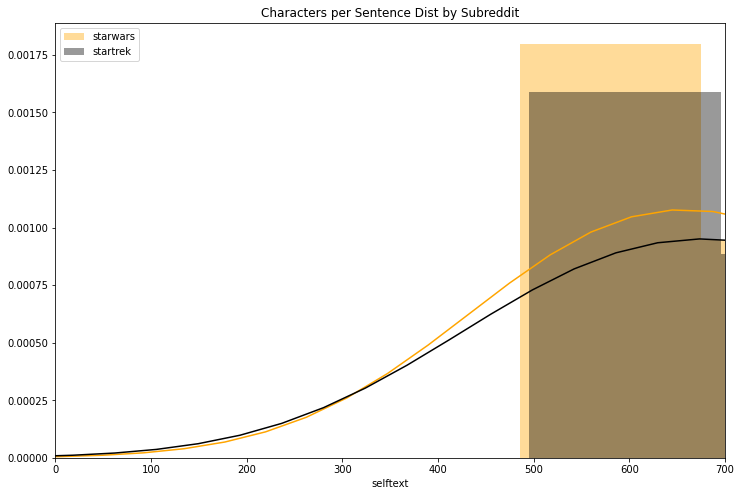

In [59]:
plt.figure(figsize = (12, 8))
plt.xlim(right = 700)
sns.distplot(df_ed.loc[df_ed['subreddit'] == 0, 'selftext'].str.len(), color = 'orange', label = 'starwars');
sns.distplot(df_ed.loc[df_ed['subreddit'] == 1, 'selftext'].str.len(), color = 'k', label = 'startrek');

plt.title('Characters per Sentence Dist by Subreddit')
plt.legend()

In [ ]:
#Both the reddits showing more or like same cherecters distribution per sentance.

In [ ]:
##Recommendation:
#Multinomial bayers model giving very outstanding performance overall in my models
#More feature options can choose like post comment, Upvotes etc. for more feature engineering can give more performance and can any get more informative analysis.
#Considering the small amount of data gathered and minimal amount of features used, the Multinomial Naive Bayes model was the most outstanding